In [137]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , PolynomialFeatures
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt
import seaborn as sns # Data Visualization
import matplotlib.pyplot as plt # Data Visualization
import plotly.express as px # Interactive Data Visualization
from jupyterthemes import jtplot # Jupyter Notebook Theme
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot # Offline version of the Plotly modules.

# Load the dataset
car_df = pd.read_csv("merged_new_cleaned.csv")
# car_df = car_df[car_df['price'] > 1000]

# Handle missing values if any
car_df = car_df.dropna()

# car_df['year'] = 2024 - car_df['year']  # Assuming the current year is 2023
# car_df = car_df.drop('year', axis=1)

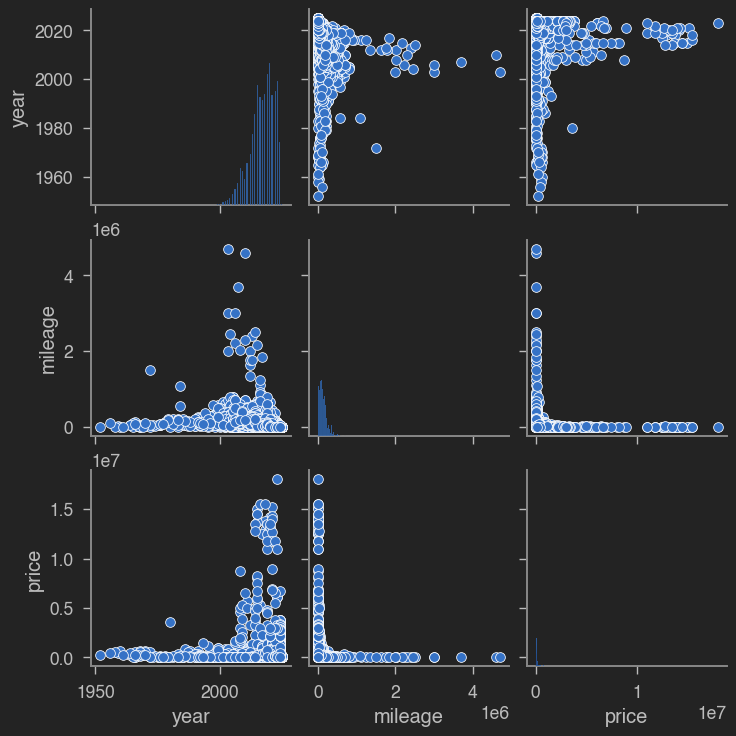

In [138]:
sns.pairplot(data = car_df) 


In [155]:
fig = px.histogram(car_df, x="brand",
                   labels={"brand": "Manufacturer"},
                   title="TOTAL OF BRANDS",
                   text_auto=True,  # Automatically add text labels
                   color_discrete_sequence=["maroon"])

fig.show()

In [160]:
fig = px.histogram(car_df, x="fuel",
                   labels={"fuel": "fuel"},
                   title="FUEL OF THE CAR",
                   text_auto=True,  # Automatically add text labels
                   )

fig.show()

In [159]:
fig = px.histogram(car_df, x="transmission",
                   labels={"transmission": "transmission"},
                   title="TRANSMISSION OF THE CARS",
                   text_auto=True,  # Automatically add text labels
                   color_discrete_sequence=["brown"])

fig.show()

In [154]:
fig = px.histogram(car_df, x="year",
                   labels={"year": "year"},
                   title="TOTAL CARS BY YEAR",
                   text_auto=True  # Automatically add text labels
                   )
fig.update_layout(bargap=0.2)  # Adjust the value as needed (0.2 is an example)

fig.show()

In [141]:
fig = px.histogram(car_df, x = "brand",
                  color = "fuel",
                  labels = {"brand":"Manufacturer"},
                  title = "BRAND AND FUEL OF THE CAR",
                  opacity = 1)
                  
fig.show()

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in ['brand', 'model', 'fuel', 'transmission']:
    le = LabelEncoder()
    car_df[column] = le.fit_transform(car_df[column])
    label_encoders[column] = le

# Split the data into features and target
X = car_df.drop('price', axis=1)
y = car_df['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from math import sqrt

In [ ]:
# Obtain the correlation matrix
numeric_car_df = car_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_car_df.corr()

<Axes: >

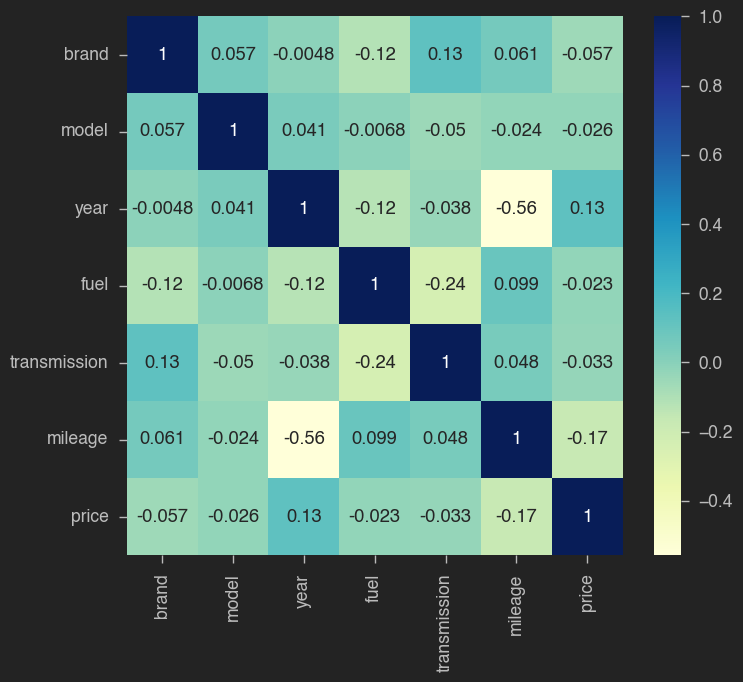

In [ ]:
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot = True)

In [ ]:
LinearRegression_model= LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.03141335755198238

In [ ]:
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.6117438045511485

In [ ]:
RandomForest_model = RandomForestRegressor(n_estimators= 5, max_depth= 5)
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=5)

In [ ]:
accuracy_RandomForest= RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.3587704520870455

In [ ]:
# modelx = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.1, max_depth=5)
modelx = xgb.XGBRegressor(
    n_estimators=1000, 
    objective='reg:squarederror',
    # num_parallel_tree=100,
    learning_rate=0.1, 
    n_jobs=4
)
# modelx = xgb.XGBRegressor(booster='gbtree', n_estimators=1000, learning_rate=1, max_depth=5)
modelx.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=4,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
accuracy_XGBoost = modelx.score(X_test, y_test)
accuracy_XGBoost

0.7240159511566162

[Text(0.5, 1.0, 'Linear Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

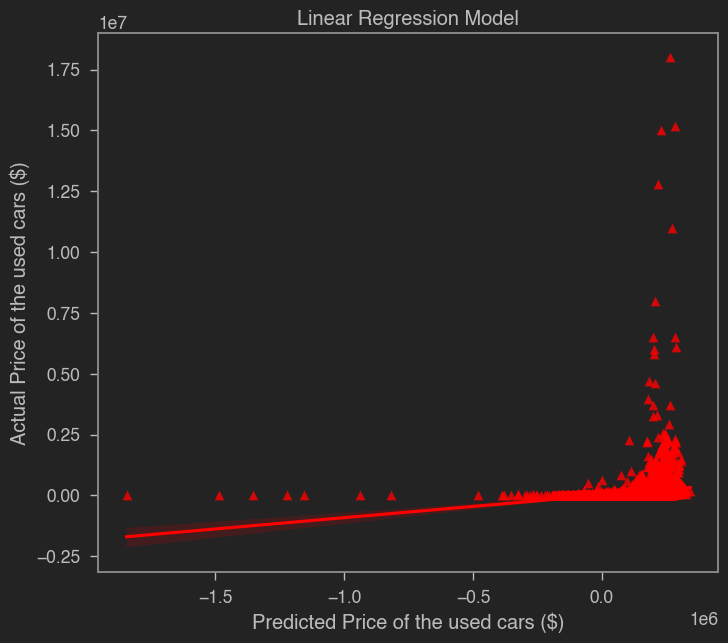

In [ ]:
y_predict_linear = LinearRegression_model.predict(X_test)

fig = sns.regplot(x=y_predict_linear, y=y_test, color='red', marker='^')
fig.set(title="Linear Regression Model", xlabel="Predicted Price of the used cars ($)", ylabel="Actual Price of the used cars ($)")

In [ ]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_linear)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_linear)
MAE= mean_absolute_error(y_test, y_predict_linear)
r2= r2_score(y_test, y_predict_linear)

# MSE : Mean Squared Error (MSE) is the mean of the squared errors which is the average squared difference between the estimated values and the actual value
# RMSE : Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors
# MAE : Mean Absolute Error (MAE) is the mean of the absolute value of the errors
# THE R-SQUARED : is a statistical measure of how close the data are to the fitted regression line
# THE R-SQUARED : 

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 505500.801 
MSE = 255531059548.92905 
MAE = 134584.8570635709 
R2 = 0.03141335755198238


[Text(0.5, 1.0, 'Random Forest Regression Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

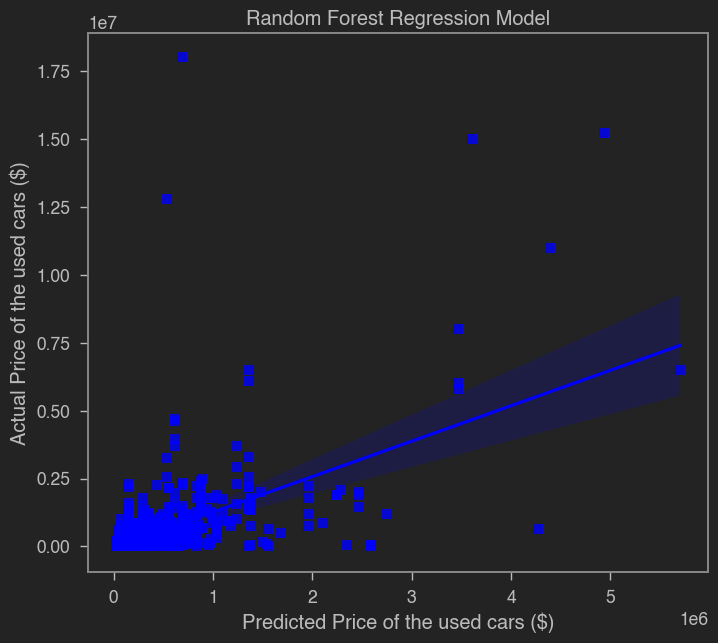

In [ ]:
y_predict_RandomForest = RandomForest_model.predict(X_test)

fig = sns.regplot(x=y_predict_RandomForest, y=y_test, color = 'blue', marker = "s")
fig.set(title = "Random Forest Regression Model", xlabel = "Predicted Price of the used cars ($)", ylabel= "Actual Price of the used cars ($)")

In [ ]:
RMSE= float(format(np.sqrt(mean_squared_error(y_test, y_predict_RandomForest)), ".3f"))
MSE= mean_squared_error(y_test, y_predict_RandomForest)
MAE= mean_absolute_error(y_test, y_predict_RandomForest)
r2= r2_score(y_test, y_predict_RandomForest)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 411300.629 
MSE = 169168207170.5545 
MAE = 90494.28272478859 
R2 = 0.3587704520870455


[Text(0.5, 1.0, 'XGBoost Model'),
 Text(0.5, 0, 'Predicted Price of the used cars ($)'),
 Text(0, 0.5, 'Actual Price of the used cars ($)')]

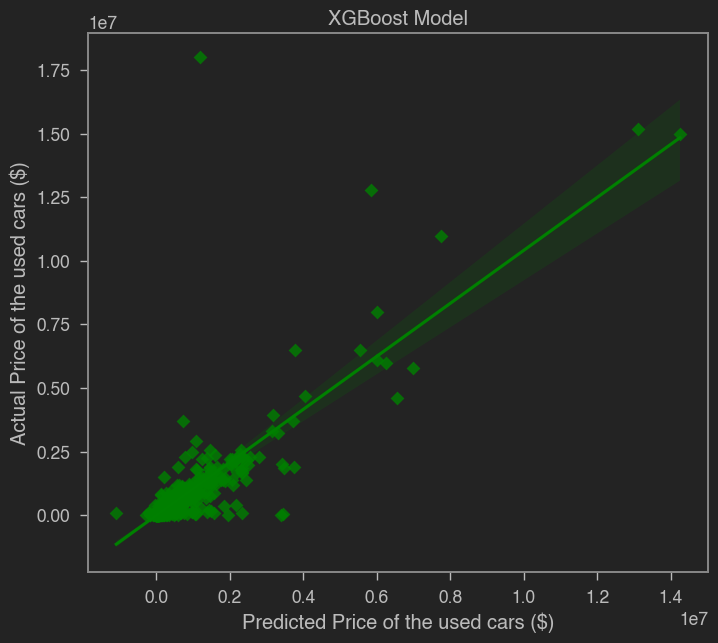

In [ ]:
y_predict_XGBoost = modelx.predict(X_test)

fig = sns.regplot(x=y_predict_XGBoost, y=y_test, color = 'green', marker = "D")
fig.set(title = "XGBoost Model", xlabel = "Predicted Price of the used cars ($)", ylabel = "Actual Price of the used cars ($)")

In [ ]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict_XGBoost)), ".3f"))
MSE = mean_squared_error(y_test, y_predict_XGBoost)
MAE = mean_absolute_error(y_test, y_predict_XGBoost)
r2 = r2_score(y_test, y_predict_XGBoost)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2) 

RMSE = 269832.722 
MSE = 72809697822.12396 
MAE = 39078.406548922976 
R2 = 0.7240159511566162


In [ ]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(modelx, open(filename, 'wb'))

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
# Function to predict the price of a specific car model
def predict_price(brand, model, year, fuel, transmission, mileage , modelx):
    # Encode the input features
    brand_encoded = label_encoders['brand'].transform([brand])[0]
    model_encoded = label_encoders['model'].transform([model])[0]
    fuel_encoded = label_encoders['fuel'].transform([fuel])[0]
    transmission_encoded = label_encoders['transmission'].transform([transmission])[0]

    # Create a DataFrame for the input features
    input_data = pd.DataFrame({
        'brand': [brand_encoded],
        'model': [model_encoded],
        'year': [year],
        'fuel': [fuel_encoded],
        'transmission': [transmission_encoded],
        'mileage': [mileage]
    })
    
    # Predict the price
    predicted_price = loaded_model.predict(input_data)
    return predicted_price[0]

# Example usage
predicted_price = predict_price('Toyota', 'Camry', 2022, 'Petrol', 'Automatic', 120000 , modelx)
print(f"The predicted price is: {round(predicted_price)}")

The predicted price is: 74071
